In [ ]:
import pandas as pd
import folium
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import Point

In [ ]:
df = pd.read_csv(r'/content/Dataset .csv')

In [ ]:
df_clean = df.dropna(subset=['Latitude', 'Longitude'])


In [ ]:
map_center = [df_clean['Latitude'].mean(), df_clean['Longitude'].mean()]
mymap = folium.Map(location=map_center, zoom_start=12)

In [ ]:
for _, row in df_clean.iterrows():
    folium.CircleMarker(
        location=[row['Latitude'], row['Longitude']],
        radius=5,
        color='blue',
        fill=True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(mymap)


In [ ]:
mymap.save("restaurants_map.html")

In [ ]:
restaurant_counts = df['City'].value_counts()


<ipython-input-24-77ecbd44cb4c>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=restaurant_counts.index, y=restaurant_counts.values, palette='viridis')


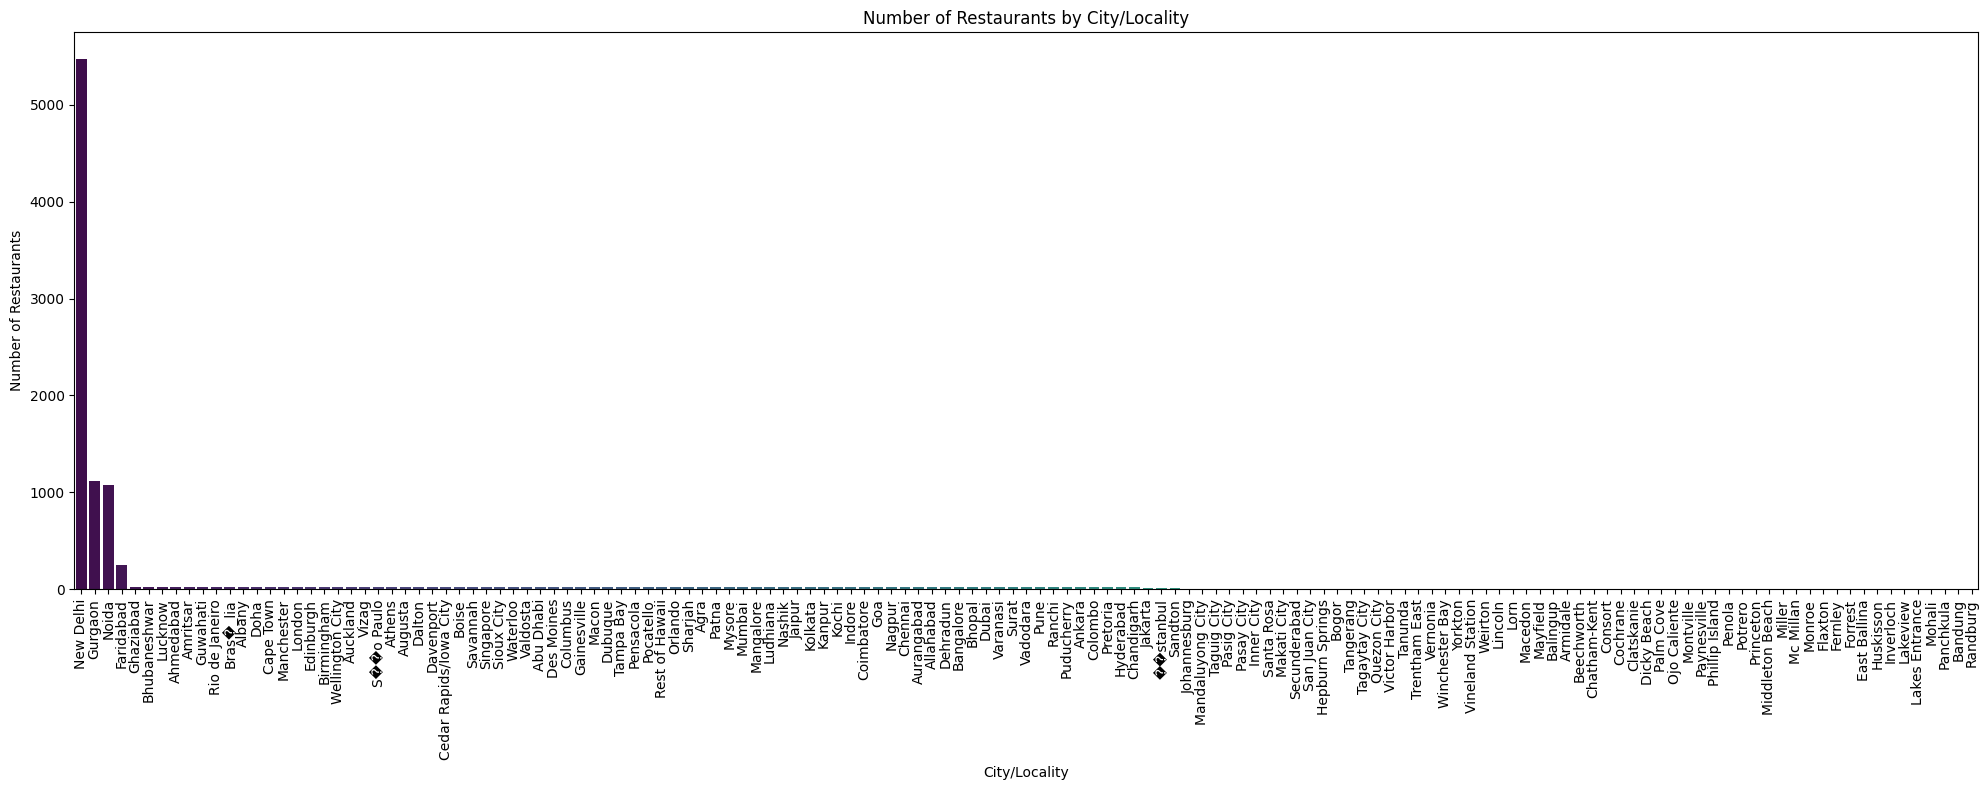

In [ ]:
plt.figure(figsize=(20, 8))
sns.barplot(x=restaurant_counts.index, y=restaurant_counts.values, palette='viridis')
plt.title("Number of Restaurants by City/Locality")
plt.xlabel("City/Locality")
plt.ylabel("Number of Restaurants")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


In [ ]:
avg_ratings_by_city = df.groupby('City')['Aggregate rating'].mean().sort_values(ascending=False)
avg_price_range_by_city = df.groupby('City')['Price range'].mean()

print("Average Ratings by City:")
print(avg_ratings_by_city)

Average Ratings by City:
City
Inner City          4.900000
Quezon City         4.800000
Makati City         4.650000
Pasig City          4.633333
Mandaluyong City    4.625000
                      ...   
New Delhi           2.438845
Montville           2.400000
Mc Millan           2.400000
Noida               2.036204
Faridabad           1.866932
Name: Aggregate rating, Length: 141, dtype: float64


In [ ]:
pip install cartopy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.7/11.7 MB 122.2 MB/s eta 0:00:00


/usr/local/lib/python3.11/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/110m_physical/ne_110m_coastline.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/usr/local/lib/python3.11/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/110m_cultural/ne_110m_admin_0_boundary_lines_land.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


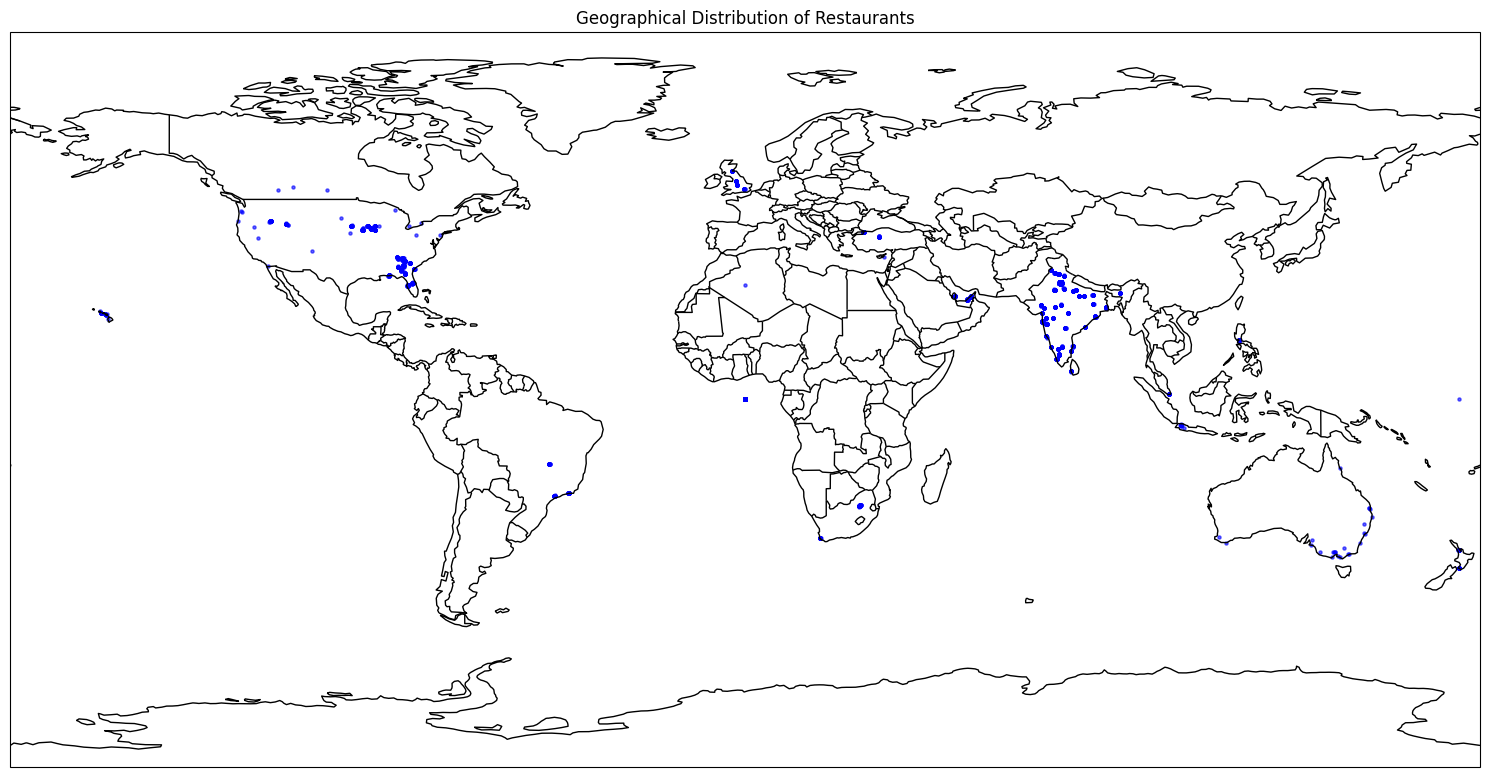

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from shapely.geometry import Point

geometry = [Point(xy) for xy in zip(df['Longitude'], df['Latitude'])]
gdf = gpd.GeoDataFrame(df, geometry=geometry)
fig, ax = plt.subplots(figsize=(15, 10), subplot_kw={'projection': ccrs.PlateCarree()})
ax.set_extent([-180, 180, -90, 90])
ax.coastlines(resolution='110m')
ax.add_feature(ccrs.cartopy.feature.BORDERS)
gdf.plot(ax=ax, marker='o', color='blue', markersize=5, alpha=0.6)
plt.title("Geographical Distribution of Restaurants")
plt.tight_layout()
plt.show()


Average Ratings by City:
City
Inner City          4.900000
Quezon City         4.800000
Makati City         4.650000
Pasig City          4.633333
Mandaluyong City    4.625000
                      ...   
New Delhi           2.438845
Montville           2.400000
Mc Millan           2.400000
Noida               2.036204
Faridabad           1.866932
Name: Aggregate rating, Length: 141, dtype: float64


<ipython-input-25-4f0924aa3302>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_ratings_by_city.index, y=avg_ratings_by_city.values, palette='coolwarm')


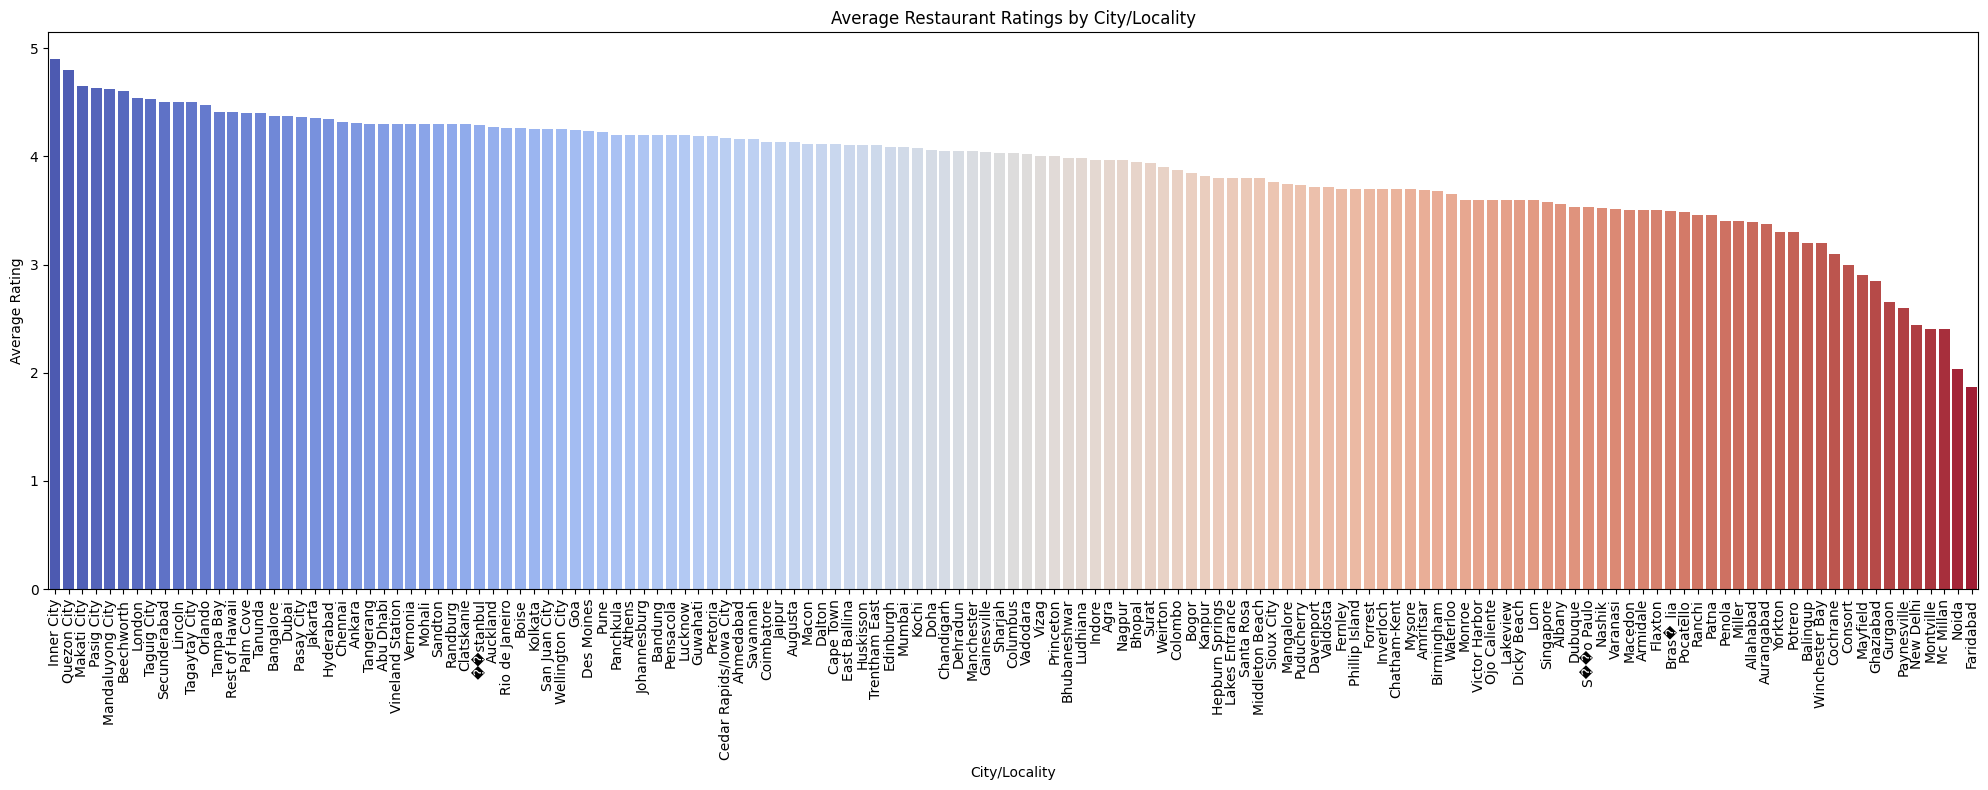

Average Price Range by City:
City
Abu Dhabi          3.300000
Agra               2.650000
Ahmedabad          2.571429
Albany             1.700000
Allahabad          2.650000
                     ...   
Weirton            2.000000
Wellington City    3.250000
Winchester Bay     2.000000
Yorkton            2.000000
��stanbul          2.857143
Name: Price range, Length: 141, dtype: float64


In [ ]:
avg_ratings_by_city = df.groupby('City')['Aggregate rating'].mean().sort_values(ascending=False)
avg_price_range_by_city = df.groupby('City')['Price range'].mean()
print("Average Ratings by City:")
print(avg_ratings_by_city)
plt.figure(figsize=(20, 8))
sns.barplot(x=avg_ratings_by_city.index, y=avg_ratings_by_city.values, palette='coolwarm')
plt.title("Average Restaurant Ratings by City/Locality")
plt.xlabel("City/Locality")
plt.ylabel("Average Rating")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()
print("Average Price Range by City:")
print(avg_price_range_by_city)


In [ ]:
import folium
from folium.plugins import HeatMap
map_center = [df['Latitude'].mean(), df['Longitude'].mean()]
restaurant_map = folium.Map(location=map_center, zoom_start=12)
heat_data = [[row['Latitude'], row['Longitude']] for _, row in df.iterrows()]
HeatMap(heat_data).add_to(restaurant_map)

restaurant_map.save("restaurant_density_map.html")


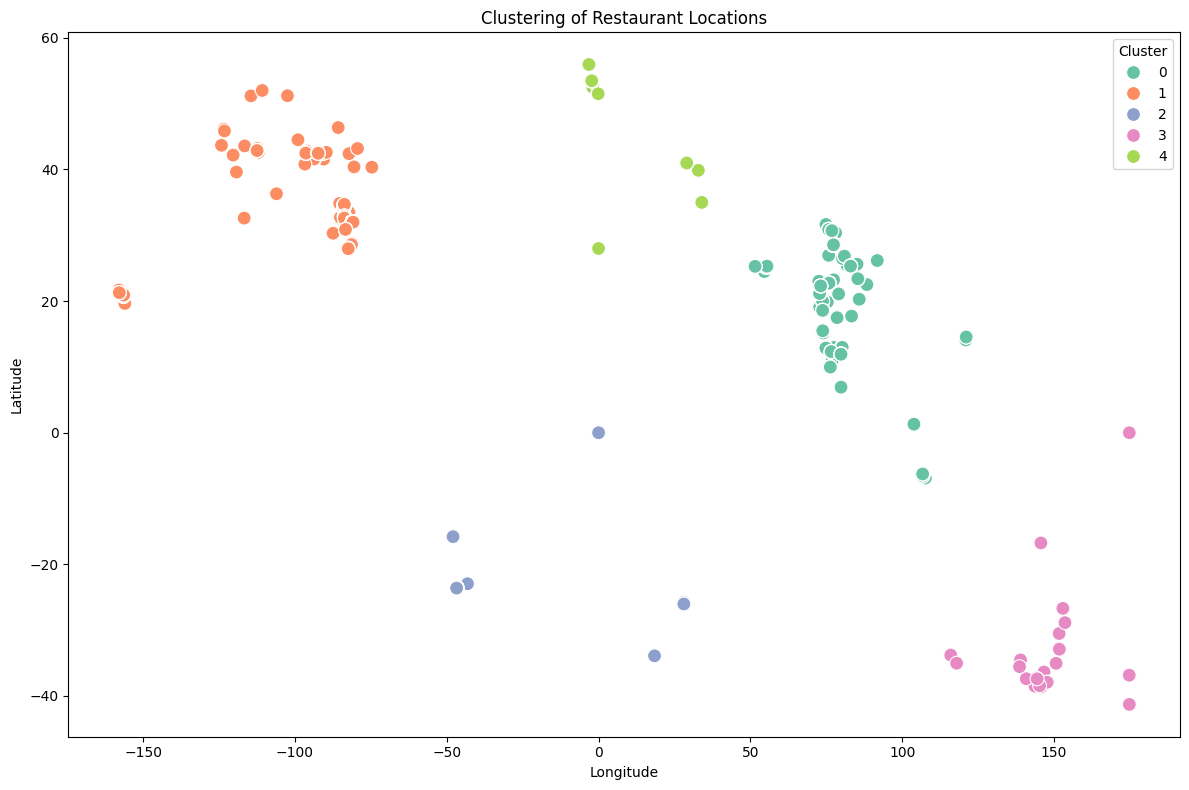

In [ ]:
from sklearn.cluster import KMeans
import numpy as np
coordinates = df[['Latitude', 'Longitude']].dropna()
kmeans = KMeans(n_clusters=5, random_state=42)
df['Cluster'] = kmeans.fit_predict(coordinates)
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x='Longitude', y='Latitude', hue='Cluster', palette='Set2', s=100)
plt.title("Clustering of Restaurant Locations")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.legend(title="Cluster")
plt.tight_layout()
plt.show()
